# 모델 저장

-   학습한 모델을 저장장치에 파일로 저장하고 나중에 불러와 사용(추가 학습, 예측 서비스) 할 수 있도록 한다.
-   파이토치는 **모델의 파라미터만 저장**하는 방법과 **모델 구조와 파라미터 모두를 저장**하는 두가지 방식을 제공한다.
-   저장 함수
    -   `torch.save(저장할 객체, 저장경로)`
-   보통 저장파일의 확장자는 `pt`나 `pth` 를 지정한다.

## 모델 전체 저장하기 및 불러오기

-   저장하기
    -   `torch.save(model, 저장경로)`
-   불러오기
    -   `load_model = torch.load(저장경로)`
-   저장시 **pickle**을 이용해 직렬화하기 때문에 불어오는 실행환경에도 모델을 저장할 때 사용한 클래스가 있어야 한다.


## 모델의 파라미터만 저장

-   모델을 구성하는 파라미터만 저장한다.
-   모델의 구조는 저장하지 않기 때문에 불러올 때 **모델을 먼저 생성하고 생성한 모델에 불러온 파라미터를 덮어씌운다.**
-   모델의 파라미터는 **state_dict** 형식으로 저장한다.

### state_dict

-   모델의 파라미터 Tensor들을 레이어 단위별로 나누어 저장한 Ordered Dictionary (OrderedDict)
-   `모델객체.state_dict()` 메소드를 이용해 조회한다.
-   모델의 state_dict을 조회 후 저장한다.
    -   `torch.save(model.state_dict(), "저장경로")`
-   생성된 모델에 읽어온 state_dict를 덮어씌운다.
    -   `new_model.load_state_dict(torch.load("state_dict저장경로"))`


## Checkpoint를 저장 및 불러오기

-   학습이 끝나지 않은 모델을 저장 후 나중에 이어서 학습시킬 경우에는 모델의 구조, 파라미터 뿐만 아니라 optimizer, loss 함수등 학습에 필요한 객체들을 저장해야 한다.
-   Dictionary에 저장하려는 값들을 key-value 쌍으로 저장후 `torch.save()`를 이용해 저장한다.

```python
# 저장
torch.save({
    'epoch':epoch,
    'model_state_dict':model.state_dict(),
    'optimizer_state_dict':optimizer.state_dict(),
    'loss':train_loss
}, "저장경로")

# 불러오기
model = MyModel()
optimizer = optim.Adam(model.parameter())

# loading된 checkpoint 값 이용해 이전 학습상태 복원
checkpoint = torch.load("저장경로")
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']
```


In [3]:
#  Linear의 파라미터(weight, bias) 개수: 입력feature * 출력feature + 출력feature
# (784, 128) 784 * 128 + 128
import torch
import torch.nn as nn
class MyModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.lr1 = nn.Linear(3, 4) # 3 X 4 + 4 
        self.lr2 = nn.Linear(4, 2)
        self.relu = nn.ReLU() # activation함수->파라미터가 없는 단순 계산함수. relu(X) = max(X, 0)
    def forward(self, X):
        X = self.lr1(X)
        X = self.relu(X)
        X = self.lr2(X)
        return X

In [4]:
model = MyModel()
model

MyModel(
  (lr1): Linear(in_features=3, out_features=4, bias=True)
  (lr2): Linear(in_features=4, out_features=2, bias=True)
  (relu): ReLU()
)

In [5]:
import os
os.makedirs("saved_models", exist_ok=True)

In [6]:
# 모델을 저장
torch.save(model, "saved_models/my_model.pt")

In [8]:
## 저장된 모델 Load
load_model = torch.load("saved_models/my_model.pt")

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7712\197926485.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load_model = torch.load("saved_models/my_model.pt")


In [9]:
load_model

MyModel(
  (lr1): Linear(in_features=3, out_features=4, bias=True)
  (lr2): Linear(in_features=4, out_features=2, bias=True)
  (relu): ReLU()
)

In [10]:
## 모델에 Layer들을 조회. 모델.instance변수명
lr_layer = model.lr1
lr_layer

Linear(in_features=3, out_features=4, bias=True)

In [11]:
## Layer에서 weight/bias 조회.  layer.weight, layer.bias
lr1_weight = lr_layer.weight
lr1_bias = lr_layer.bias

In [12]:
lr1_weight

Parameter containing:
tensor([[ 0.0288, -0.5614, -0.4909],
        [-0.3311, -0.3771,  0.4307],
        [ 0.3548, -0.5195, -0.1379],
        [-0.5446, -0.1220,  0.5561]], requires_grad=True)

In [13]:
lr1_bias

Parameter containing:
tensor([-0.4172,  0.0534, -0.5352,  0.1600], requires_grad=True)

In [14]:
load_model.lr1.weight

Parameter containing:
tensor([[ 0.0288, -0.5614, -0.4909],
        [-0.3311, -0.3771,  0.4307],
        [ 0.3548, -0.5195, -0.1379],
        [-0.5446, -0.1220,  0.5561]], requires_grad=True)

In [15]:
load_model.lr1.bias

Parameter containing:
tensor([-0.4172,  0.0534, -0.5352,  0.1600], requires_grad=True)

In [18]:
####### 파라미터들(weight들, bias들)만 저장/불러기기
# state_dict
state_dict = model.state_dict()  # 타입: collections.OrderedDict   - [(key, value), (key, value), ..]
state_dict

OrderedDict([('lr1.weight',
              tensor([[ 0.0288, -0.5614, -0.4909],
                      [-0.3311, -0.3771,  0.4307],
                      [ 0.3548, -0.5195, -0.1379],
                      [-0.5446, -0.1220,  0.5561]])),
             ('lr1.bias', tensor([-0.4172,  0.0534, -0.5352,  0.1600])),
             ('lr2.weight',
              tensor([[-0.1050,  0.2449,  0.0083, -0.4915],
                      [-0.0403,  0.3696,  0.2914,  0.3962]])),
             ('lr2.bias', tensor([-0.1641,  0.3765]))])

In [19]:
state_dict.keys()

odict_keys(['lr1.weight', 'lr1.bias', 'lr2.weight', 'lr2.bias'])

In [20]:
# 저장
torch.save(state_dict, "saved_models/my_model_parameter.pt")

In [23]:
sd = torch.load("saved_models/my_model_parameter.pt")

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7712\3810450207.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sd = torch.load("saved_models/my_model_parameter.pt")


In [25]:
# 모델 객체를 생성 -> load한 state_dict를 모델 파라미터에 덮어쓴다.
new_model = MyModel()
new_model.state_dict()

OrderedDict([('lr1.weight',
              tensor([[ 0.5148,  0.4099, -0.2973],
                      [-0.1596, -0.4820, -0.2951],
                      [-0.2226,  0.4307,  0.0505],
                      [-0.4605,  0.2338,  0.2596]])),
             ('lr1.bias', tensor([ 0.5370, -0.4554, -0.0964, -0.1462])),
             ('lr2.weight',
              tensor([[-0.3830, -0.4005,  0.3755,  0.1092],
                      [ 0.4894, -0.1427, -0.2676, -0.3616]])),
             ('lr2.bias', tensor([-0.0450, -0.3085]))])

In [26]:
new_model.load_state_dict(sd)

<All keys matched successfully>

In [27]:
new_model.state_dict()

OrderedDict([('lr1.weight',
              tensor([[ 0.0288, -0.5614, -0.4909],
                      [-0.3311, -0.3771,  0.4307],
                      [ 0.3548, -0.5195, -0.1379],
                      [-0.5446, -0.1220,  0.5561]])),
             ('lr1.bias', tensor([-0.4172,  0.0534, -0.5352,  0.1600])),
             ('lr2.weight',
              tensor([[-0.1050,  0.2449,  0.0083, -0.4915],
                      [-0.0403,  0.3696,  0.2914,  0.3962]])),
             ('lr2.bias', tensor([-0.1641,  0.3765]))])

In [28]:
# 파이토치 모델 구조를 조사해주는 패키지.
!pip install torchinfo

In [29]:
model

MyModel(
  (lr1): Linear(in_features=3, out_features=4, bias=True)
  (lr2): Linear(in_features=4, out_features=2, bias=True)
  (relu): ReLU()
)

In [30]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                   Param #
MyModel                                  --
├─Linear: 1-1                            16
├─Linear: 1-2                            10
├─ReLU: 1-3                              --
Total params: 26
Trainable params: 26
Non-trainable params: 0

In [31]:
summary(model, (100, 3))  #(model, (input data의 shape))  (100:batch_size, 3: feature수)

Layer (type:depth-idx)                   Output Shape              Param #
MyModel                                  [100, 2]                  --
├─Linear: 1-1                            [100, 4]                  16
├─ReLU: 1-2                              [100, 4]                  --
├─Linear: 1-3                            [100, 2]                  10
Total params: 26
Trainable params: 26
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.01

# 문제 유형별 MLP 네트워크
- 해결하려는 문제 유형에 따라 출력 Layer의 구조가 바뀐다.
- 딥러닝 구조에서 **Feature를 추출하는 Layer 들을 Backbone** 이라고 하고 **추론하는 Layer들을 Head** 라고 한다. 


> - MLP(Multi Layer Perceptron), DNN(Deep Neural Network), ANN(Artificial Neural Network)
>     -   Fully Connected Layer(nn.Linear)로 구성된 딥러닝 모델
>     -   input feature들 모두에 대응하는 weight들(가중치)을 사용한다.
> 

## Regression(회귀)

### Boston Housing Dataset

보스턴 주택가격 dataset은 다음과 같은 속성을 바탕으로 해당 타운 주택 가격의 중앙값을 예측하는 문제.

-   CRIM: 범죄율
-   ZN: 25,000 평방피트당 주거지역 비율
-   INDUS: 비소매 상업지구 비율
-   CHAS: 찰스강에 인접해 있는지 여부(인접:1, 아니면:0)
-   NOX: 일산화질소 농도(단위: 0.1ppm)
-   RM: 주택당 방의 수
-   AGE: 1940년 이전에 건설된 주택의 비율
-   DIS: 5개의 보스턴 직업고용센터와의 거리(가중 평균)
-   RAD: 고속도로 접근성
-   TAX: 재산세율
-   PTRATIO: 학생/교사 비율
-   B: 흑인 비율
-   LSTAT: 하위 계층 비율
    <br><br>
-   **Target**
    -   MEDV: 타운의 주택가격 중앙값(단위: 1,000달러)


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from torchinfo import summary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
# 1. Dataset 준비
## 데이터 불러오기 -> 전처리 -> Dataset -> DataLoader
df = pd.read_csv("data/boston_hosing.csv")
df.shape

(506, 14)

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
## X, y
X_boston = df.drop(columns='MEDV').values
y_boston = df['MEDV'].values
y_boston = y_boston.reshape(-1, 1)
X_boston.shape, y_boston.shape

((506, 13), (506, 1))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size=0.2, random_state=0)

In [7]:
# 딥러닝 모델 -> 선형회귀기반: 전처리 - 연속형: Feature scaling, 범주형: One Hot Encoding
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
## Dataset
trainset = TensorDataset(
    torch.tensor(X_train_scaled, dtype=torch.float32),
    torch.tensor(y_train, dtype=torch.float32)
)
testset = TensorDataset(
    torch.tensor(X_test_scaled, dtype=torch.float32),
    torch.tensor(y_test, dtype=torch.float32)
)
len(trainset), len(testset)

(404, 102)

In [11]:
## DataLoader
train_loader = DataLoader(trainset, batch_size=404, shuffle=True)
test_loader = DataLoader(testset, batch_size=102)
len(train_loader), len(test_loader)

(1, 1)

In [15]:
##################### 모델 정의
# nn.Module 상속. 
# __init__(): layer 객체들 초기화, forward(): 추론 계산과정을 정의
class BostonHousingModeling(nn.Module):

    def __init__(self):
        super().__init__()
        self.lr1 = nn.Linear(13, 16)
        self.lr2 = nn.Linear(16, 8)
        self.lr3 = nn.Linear(8, 1)  # 최종 출력결과(집값 중위수 1개).
        self.relu = nn.ReLU() # activation 함수.
    
    def forward(self, X):
        X = self.lr1(X)
        X = self.relu(X)
        X = self.lr2(X)
        X = self.relu(X)
        output = self.lr3(X) 
        return output
        # 출력 layer(output)은 activation 함수를 통과시키지 않음
        # 값의 범위가 정해져 있고 그 범위의 값을 반환하는 함수가 있을 경우는 사용할 수 있다.
        ##  출력값 범위: 0 ~ 1 실수 - logistic(sigmoid), -1 ~ 1 사이 실수: tanh 함수
        

In [17]:
## 모델 객체 생성
boston_model = BostonHousingModeling().to(device)
summary(boston_model, (404, 13), device=device)

Layer (type:depth-idx)                   Output Shape              Param #
BostonHousingModeling                    [404, 1]                  --
├─Linear: 1-1                            [404, 16]                 224
├─ReLU: 1-2                              [404, 16]                 --
├─Linear: 1-3                            [404, 8]                  136
├─ReLU: 1-4                              [404, 8]                  --
├─Linear: 1-5                            [404, 1]                  9
Total params: 369
Trainable params: 369
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.15
Input size (MB): 0.02
Forward/backward pass size (MB): 0.08
Params size (MB): 0.00
Estimated Total Size (MB): 0.10

In [19]:
### 학습: loss_fn(회귀: nn.MSELoss, nn.functional.mse_loss), optimizer
epochs = 1000
lr = 0.001

optimizer = optim.Adam(boston_model.parameters(), lr=lr)
loss_fn = nn.MSELoss() # 회귀: Mean Squared Error

In [21]:
####### Train + Evaluation(에폭당)
import time
train_losses = []
valid_losses = []

s = time.time()
for epoch in range(epochs):  # tqdm 라이브러리
    #######################################
    # Train
    #######################################
    # 1. 모델을 train 모드로 변경
    boston_model.train()
    train_loss = 0.0
    # 2. Batch 단위로 학습 - 반복문.
    for X_train, y_train in train_loader:
        # 3. X, y를 device로 이동.
        X_train, y_train = X_train.to(device), y_train.to(device)
        # 4. 추론
        pred = boston_model(X_train) # model.forward(X_train)
        # 5. loss(오차) 계산
        loss = loss_fn(pred, y_train)  # (추론한값,  정답)
        # 6. 파라미터들의 gradient 계산
        loss.backward()
        # 7. 파라미터들 업데이트
        optimizer.step()
        # 8. gradient 초기화
        optimizer.zero_grad()
        ## 로그용 - LOSS 저장
        train_loss += loss.item()
    train_loss /= len(train_loader) # train loss의 step별 평균을 계산 -> 한 epoch의 train loss

    #######################################
    # Evaluation
    #######################################
    # 1. eval 모드
    boston_model.eval()
    valid_loss = 0.0
    # 2. gradient function 구하지 않도록 처리
    with torch.no_grad():
        for X_valid, y_valid in test_loader: #step 단위로 평가
            # 3. X, y를 device로 이동
            X_valid, y_valid = X_valid.to(device), y_valid.to(device)
            # 4. 추론
            pred_valid = boston_model(X_valid)
            # 5. 검증(평가) - MSE
            loss_valid = loss_fn(pred_valid, y_valid)
            valid_loss += loss_valid.item()
            
        valid_loss /= len(test_loader) # 평균계산.

    ## loss 계산한 것들을 list에 추가. 로그 출력
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    print(f"[{epoch+1:04d}/{epochs}] - train loss: {train_loss}, valid loss: {valid_loss}")

e = time.time()
print("총학습에 걸린시간(초):", (e-s))

[0001/1000] - train loss: 605.1829223632812, valid loss: 583.3720092773438
[0002/1000] - train loss: 604.84228515625, valid loss: 583.0517578125
[0003/1000] - train loss: 604.4996948242188, valid loss: 582.7281494140625
[0004/1000] - train loss: 604.1549072265625, valid loss: 582.3994140625
[0005/1000] - train loss: 603.8070678710938, valid loss: 582.0691528320312
[0006/1000] - train loss: 603.4557495117188, valid loss: 581.7369384765625
[0007/1000] - train loss: 603.0997924804688, valid loss: 581.4033203125
[0008/1000] - train loss: 602.7415161132812, valid loss: 581.0679321289062
[0009/1000] - train loss: 602.3812255859375, valid loss: 580.73095703125
[0010/1000] - train loss: 602.0177612304688, valid loss: 580.392333984375
[0011/1000] - train loss: 601.6516723632812, valid loss: 580.0525512695312
[0012/1000] - train loss: 601.2818603515625, valid loss: 579.7083129882812
[0013/1000] - train loss: 600.9086303710938, valid loss: 579.3601684570312
[0014/1000] - train loss: 600.531860351

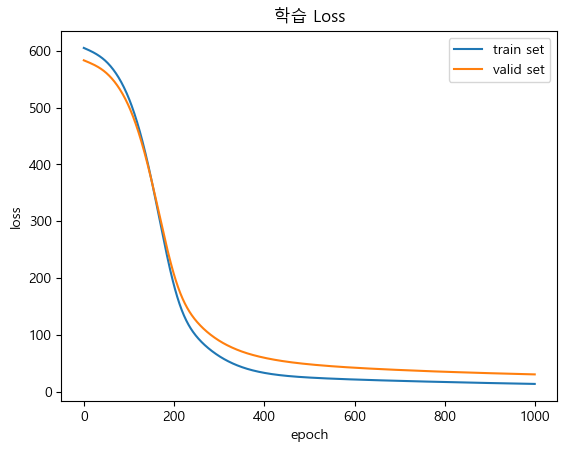

In [32]:
# loss 시각화
plt.plot(range(epochs), train_losses, label="train set")
plt.plot(range(epochs), valid_losses, label="valid set")
plt.title("학습 Loss")
# plt.ylim(10, 50)
# plt.xlim(800, 1000)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

## 분류 (Classification)

### Fashion MNIST Dataset - 다중분류(Multi-Class Classification) 문제

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋.
이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 의류 품목을 나타낸다:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>그림</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

- **Feature**이미지는 28x28 크기이며 Gray scale이다.
- **Target**은 총 10개의 class로 구성되어 있으며 각 class의 class 이름은 다음과 같다.

| 레이블 | 클래스       |
|--------|--------------|
| 0      | T-shirt/top |
| 1      | Trousers    |
| 2      | Pullover    |
| 3      | Dress       |
| 4      | Coat        |
| 5      | Sandal      |
| 6      | Shirt       |
| 7      | Sneaker     |
| 8      | Bag         |
| 9      | Ankle boot  |

### 위스콘신 유방암 데이터셋 - 이진분류(Binary Classification) 문제

-   **이진 분류 문제 처리 모델의 두가지 방법**
    1. positive(1)일 확률을 출력하도록 구현
        - output layer: units=1, activation='sigmoid'
        - loss: binary_crossentropy
    2. negative(0)일 확률과 positive(1)일 확률을 출력하도록 구현 => 다중분류 처리 방식으로 해결
        - output layer: units=2, activation='softmax', y(정답)은 one hot encoding 처리
        - loss: categorical_crossentropy
-   위스콘신 대학교에서 제공한 종양의 악성/양성여부 분류를 위한 데이터셋
-   Feature
    -   종양에 대한 다양한 측정값들
-   Target의 class
    -   0 - malignant(악성종양)
    -   1 - benign(양성종양)


# 모델 유형별 구현 정리

## 공통

-   Input layer(첫번째 Layer)의 in_features
    -   입력데이터의 feature(속성) 개수에 맞춰준다.
-   Hidden layer 수
    -   경험적(art)으로 정한다.
    -   Hidden layer에 Linear를 사용하는 경우 보통 feature 수를 줄여 나간다. (핵심특성들을 추출해나가는 과정의 개념.)

## 회귀 모델

-   output layer의 출력 unit개수(out_features)
    -   정답의 개수
    -   ex
        -   집값: 1
        -   아파트가격, 단독가격, 빌라가격: 3 => y의 개수에 맞춘다.
-   출력 Layer에 적용하는 activation 함수
    -   일반적으로 **None**
    -   값의 범위가 설정되 있고 그 범위의 값을 출력하는 함수가 있을 경우
        -   ex) 0 ~ 1: logistic(Sigmoid), -1 ~ 1: hyperbolic tangent(Tanh)
-   loss함수
    -   MSELoss
-   평가지표
    -   MSE, RMSE, R square($R^2$)

## 다중분류 모델

-   output layer의 unit 개수
    -   정답 class(고유값)의 개수
-   출력 Layer에 적용하는 activation 함수
    -   Softmax: 클래스별 확률을 출력
-   loss함수
    -   **categrocial crossentropy**
    -   파이토치 함수
        -   **CrossEntropyLoss** = NLLLoss(정답) + LogSoftmax(모델 예측값)
        -   **NLLLoss**
            -   정답을 OneHot Encoding 처리 후 Loss를 계산한다.
            -   입력으로 LogSoftmax 처리한 모델 예측값과 onehot encoding 안 된 정답을 받는다.
        -   **LogSoftmax**
            -   입력값에 Softmax 계산후 그 Log를 계산한다.
                -   NLLLoss의 모델 예측값 입력값으로 처리할 때 사용한다.

```python
pred = model(input)
loss1 = nn.NLLLoss(nn.LogSoftmax(dim=-1)(pred), y)
# or
loss2 = nn.CrossEntropyLoss()(pred, y)
```

## 이진분류 모델

-   output layer의 unit 개수
    -   1개 (positive일 확률)
-   출력 Layer에 적용하는 activation 함수
    -   Sigmoid(Logistic)
-   loss 함수
    -   **Binary crossentropy**
    -   파이토치 함수: **BCELoss**
